# Naive Bayes Classification - Customer Loyalty Dataset (Lengkap dengan ROC Curve)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import  files
uploaded= files.upload()

Saving Customer Purchasing Behaviors.csv to Customer Purchasing Behaviors.csv


In [ ]:


df = pd.read_csv('Customer Purchasing Behaviors.csv')
print("Missing values before handling:")
print(df.isnull().sum())

for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

Missing values after handling:
user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after normalization:")
print(df.head())


Data after normalization:
    user_id       age  annual_income  purchase_amount  loyalty_score region  \
0 -1.724789 -1.465632      -1.090306        -1.614441      -1.210582  North   
1 -1.710233 -0.501151      -0.211563        -0.541153       0.108642  South   
2 -1.695678  0.677658       0.667180         0.532134       0.636332   West   
3 -1.681123 -1.787125      -2.408420        -1.972203      -2.002117   East   
4 -1.666568 -1.036974      -0.914557        -1.471336      -1.052275  North   

   purchase_frequency  
0           -1.712679  
1           -0.394950  
2            0.483536  
3           -2.151922  
4           -1.493057  


In [ ]:
data = pd.read_csv("Customer Purchasing Behaviors.csv")


In [ ]:
df = df.drop('user_id', axis=1)

In [ ]:
df.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,-1.465632,-1.090306,-1.614441,-1.210582,North,-1.712679
1,-0.501151,-0.211563,-0.541153,0.108642,South,-0.394950
2,0.677658,0.667180,0.532134,0.636332,West,0.483536
3,-1.787125,-2.408420,-1.972203,-2.002117,East,-2.151922
4,-1.036974,-0.914557,-1.471336,-1.052275,North,-1.493057


In [ ]:

def kategori_loyalitas(score):
    if score >= 8.0:
        return 2
    elif score >= 6.0:
        return 1
    else:
        return 0

data['Loyalitas'] = data['loyalty_score'].apply(kategori_loyalitas)
print("Distribusi kelas:")
print(data['Loyalitas'].value_counts())

Distribusi kelas:
Loyalitas
2    83
1    79
0    76
Name: count, dtype: int64


In [ ]:
data_encoded = pd.get_dummies(data, columns=['region'], drop_first=True)

In [ ]:

features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency',
            'region_North', 'region_South', 'region_West']
X = data_encoded[features]
y = data_encoded['Loyalitas']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model_nb.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred), 2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Berisiko', 'Biasa', 'Loyal']))

Akurasi: 0.92

Confusion Matrix:
[[13  2  0]
 [ 0 16  0]
 [ 0  2 15]]

Classification Report:
              precision    recall  f1-score   support

    Berisiko       1.00      0.87      0.93        15
       Biasa       0.80      1.00      0.89        16
       Loyal       1.00      0.88      0.94        17

    accuracy                           0.92        48
   macro avg       0.93      0.92      0.92        48
weighted avg       0.93      0.92      0.92        48



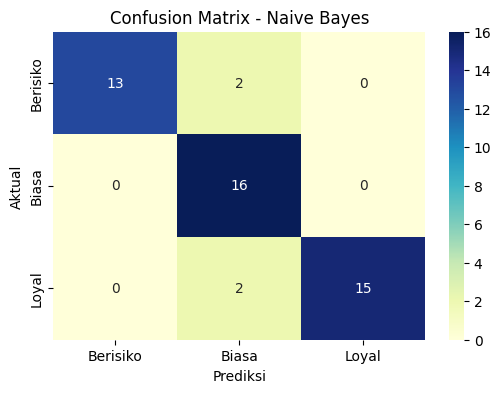

In [ ]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Berisiko', 'Biasa', 'Loyal'],
            yticklabels=['Berisiko', 'Biasa', 'Loyal'])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

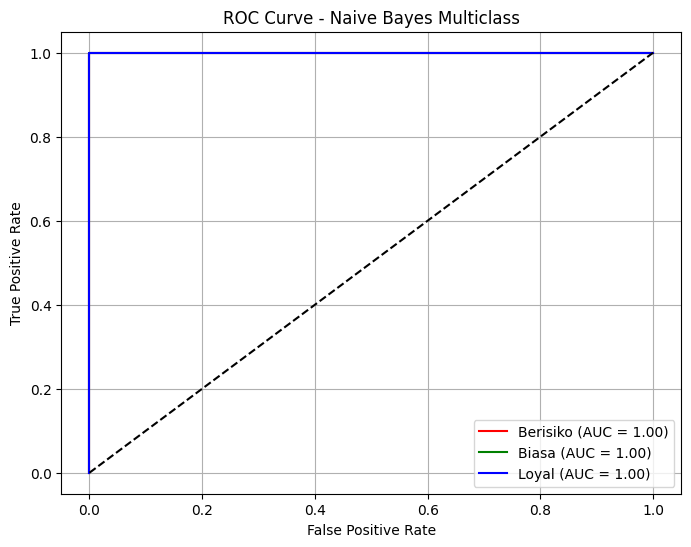

In [ ]:

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model_nb.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
labels = ['Berisiko', 'Biasa', 'Loyal']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Naive Bayes Multiclass")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3597 - loss: 1.3554 - val_accuracy: 0.3684 - val_loss: 1.2341
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3593 - loss: 1.2954 - val_accuracy: 0.3684 - val_loss: 1.1294
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 1.2454 - val_accuracy: 0.4211 - val_loss: 1.0509
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5308 - loss: 1.0784 - val_accuracy: 0.4211 - val_loss: 0.9892
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4926 - loss: 1.0533 - val_accuracy: 0.3684 - val_loss: 0.9319
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4838 - loss: 1.0276 - val_accuracy: 0.5263 - val_loss: 0.8832
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4435 - loss: 1.0008 - val_accuracy: 0.6842 - val_loss: 0.8386
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4382 - loss: 1.0005 - val_accuracy: 0.7368 - v

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Berisiko', 'Biasa', 'Loyal']))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Berisiko       0.94      1.00      0.97        15
       Biasa       1.00      0.94      0.97        16
       Loyal       1.00      1.00      1.00        17

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

Confusion Matrix:
 [[15  0  0]
 [ 1 15  0]
 [ 0  0 17]]


In [ ]:
y_all_pred = np.argmax(model.predict(scaler.transform(X)), axis=1)
df['segment_pred_ann'] = le.inverse_transform(y_all_pred)
df[['segment_pred_ann']].head()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,segment_pred_ann
0,0
1,1
2,2
3,0
4,0


# **Linear regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


In [ ]:
df = df.drop('user_id', axis=1)

In [ ]:
df.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,North,12
1,34,55000,350,7.0,South,18
2,45,65000,500,8.0,West,22
3,22,30000,150,3.0,East,10
4,29,47000,220,4.8,North,13


In [ ]:


numerical_features = ["age", "annual_income", "purchase_amount", "purchase_frequency", "loyalty_score",]
df[numerical_features].corr()['loyalty_score'].sort_values(ascending=False)

,loyalty_score
loyalty_score,1.000000
purchase_amount,0.994147
purchase_frequency,0.986990
annual_income,0.984351
age,0.981835


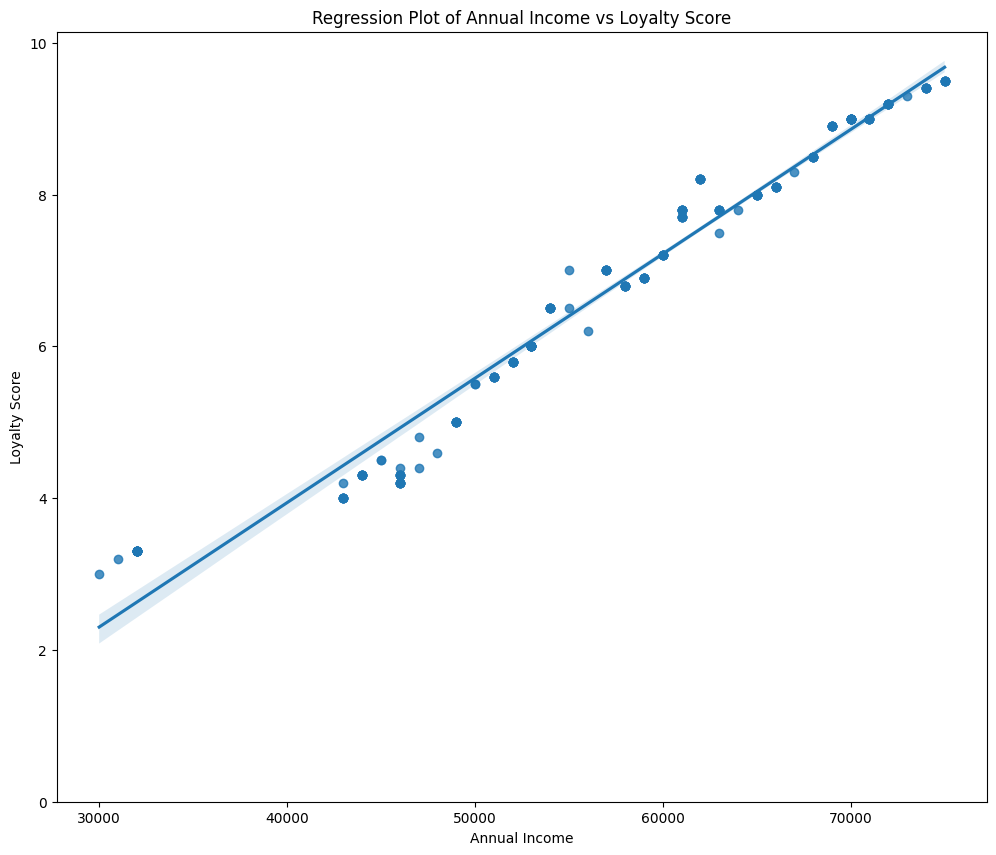

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x="annual_income", y="loyalty_score", data=df)
plt.ylim(0,)
plt.title('Regression Plot of Annual Income vs Loyalty Score')
plt.xlabel('Annual Income')
plt.ylabel('Loyalty Score')
plt.show()

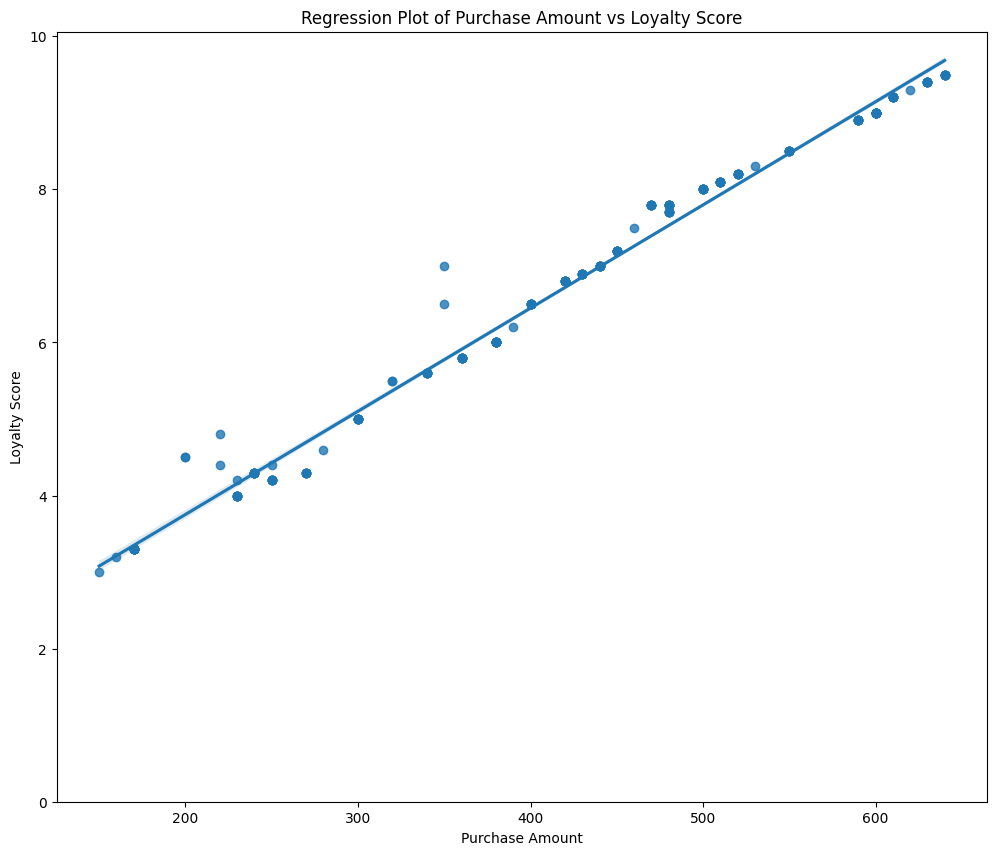

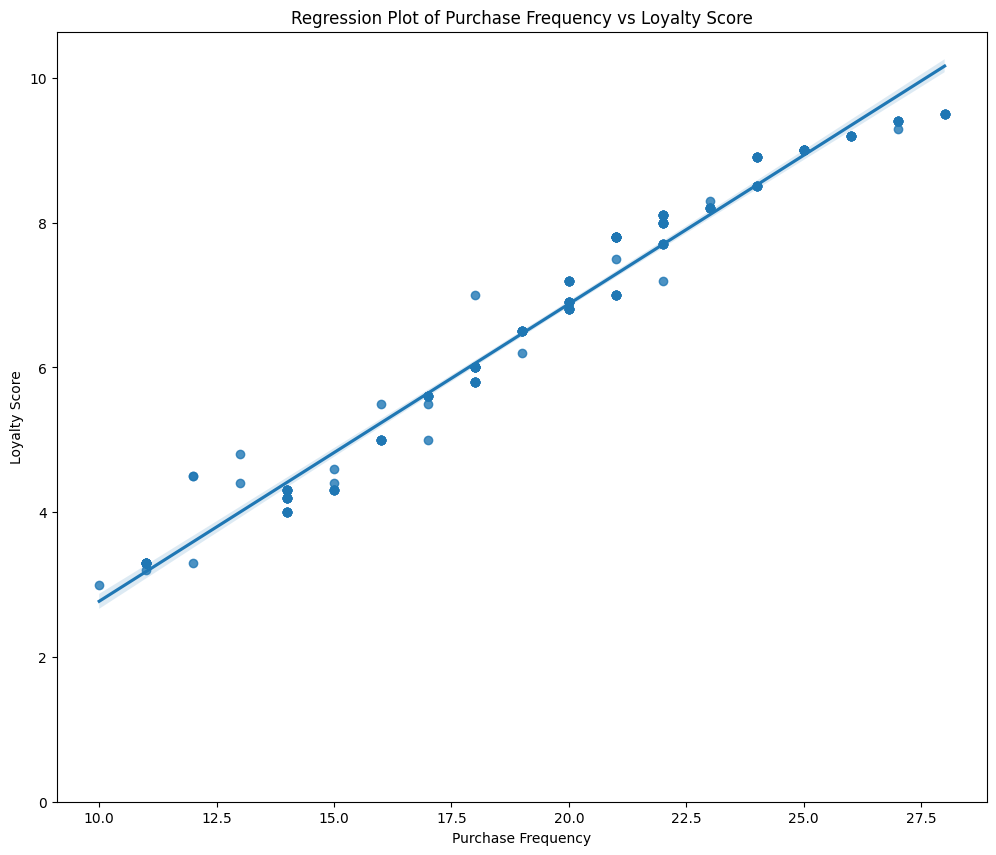

In [ ]:


width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="purchase_amount", y="loyalty_score", data=df)
plt.ylim(0,)
plt.title('Regression Plot of Purchase Amount vs Loyalty Score')
plt.xlabel('Purchase Amount')
plt.ylabel('Loyalty Score')
plt.show()

plt.figure(figsize=(width, height))
sns.regplot(x="purchase_frequency", y="loyalty_score", data=df)
plt.ylim(0,)
plt.title('Regression Plot of Purchase Frequency vs Loyalty Score')
plt.xlabel('Purchase Frequency')
plt.ylabel('Loyalty Score')
plt.show()

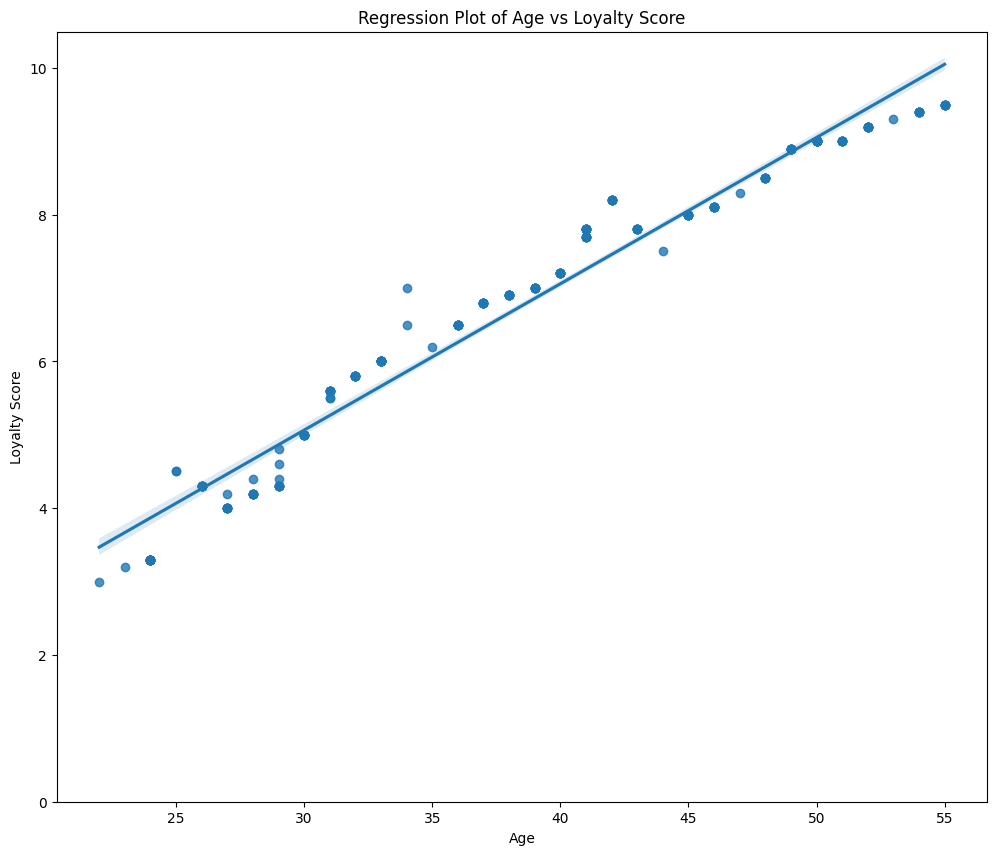

In [ ]:

width = 12
height = 10

plt.figure(figsize=(width, height))
sns.regplot(x="age", y="loyalty_score", data=df)
plt.ylim(0,)
plt.title('Regression Plot of Age vs Loyalty Score')
plt.xlabel('Age')
plt.ylabel('Loyalty Score')
plt.show()

In [ ]:

splitt = np.random.rand(len(df)) < 0.8
train = df[splitt]
test = df[~splitt]

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)


Training data shape: (183, 6)
Testing data shape: (55, 6)


In [ ]:
lr = LinearRegression()
train_x_simple = np.asanyarray(train[['annual_income']])
train_y = np.asanyarray(train[['loyalty_score']])
lr.fit(train_x_simple, train_y)
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('loyalty_score:', lr.intercept_, '+', lr.coef_, 'x', 'annual_income')

Coefficients: [[0.00016593]]
Intercept: [-2.74873317]
loyalty_score: [-2.74873317] + [[0.00016593]] x annual_income


In [ ]:

train_x_multiple = np.asanyarray(train[["annual_income","purchase_amount","purchase_frequency"]])
train_y = np.asanyarray(train[['loyalty_score']])
lr.fit(train_x_multiple,train_y)
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)


Coefficients: [[ 4.19630898e-05  1.20927972e-02 -6.18259488e-02]]
Intercept: [0.46305803]


In [ ]:
print("\n--- Simple Linear Regression (Annual Income) ---")
lr_simple = LinearRegression()
train_x_simple = np.asanyarray(train[['annual_income']])
train_y_simple = np.asanyarray(train[['loyalty_score']])
lr_simple.fit(train_x_simple, train_y_simple)
print('Coefficients:', lr_simple.coef_)
print('Intercept:', lr_simple.intercept_)
print('loyalty_score:', lr_simple.intercept_, '+', lr_simple.coef_, 'x', 'annual_income')


test_x_simple = np.asanyarray(test[['annual_income']])
test_y_simple = np.asanyarray(test[['loyalty_score']])

y_hat_simple = lr_simple.predict(test_x_simple)

epsilon = 1e-8
accuracy_simple = 100 - np.mean(np.abs((test_y_simple - y_hat_simple) / (test_y_simple + epsilon))) * 100
print('Accuracy:', round(accuracy_simple, 2), '%')

r2_simple = r2_score(test_y_simple, y_hat_simple)
print('The R-squared is:', r2_simple)

mse_simple = mean_squared_error(test_y_simple, y_hat_simple)
print('The mean square error is:', mse_simple)


--- Simple Linear Regression (Annual Income) ---
Coefficients: [[0.00016593]]
Intercept: [-2.74873317]
loyalty_score: [-2.74873317] + [[0.00016593]] x annual_income
Accuracy: 94.43 %
The R-squared is: 0.9615258842463539
The mean square error is: 0.1349908548754606


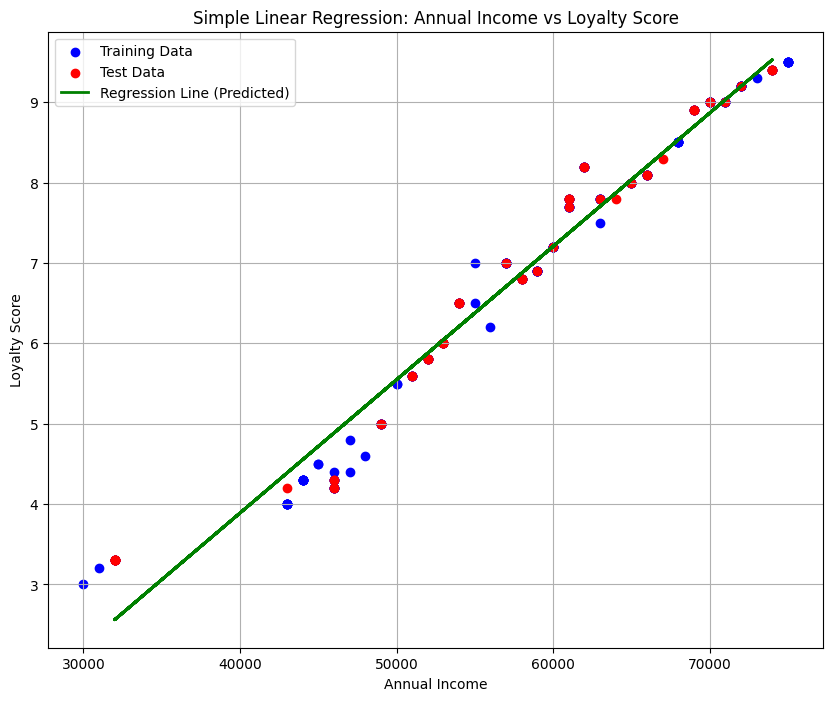

In [ ]:

plt.figure(figsize=(10, 8))

plt.scatter(train_x_simple, train_y_simple, color='blue', label='Training Data')

plt.scatter(test_x_simple, test_y_simple, color='red', label='Test Data')

plt.plot(test_x_simple, y_hat_simple, color='green', linewidth=2, label='Regression Line (Predicted)')


plt.title('Simple Linear Regression: Annual Income vs Loyalty Score')
plt.xlabel('Annual Income')
plt.ylabel('Loyalty Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("\n--- Multiple Linear Regression ---")
lr_multiple = LinearRegression()
train_x_multiple = np.asanyarray(train[["annual_income","purchase_amount","purchase_frequency"]])
train_y_multiple = np.asanyarray(train[['loyalty_score']])
lr_multiple.fit(train_x_multiple,train_y_multiple)
print('Coefficients:',lr_multiple.coef_)
print('Intercept:',lr_multiple.intercept_)

test_x_multiple = np.asanyarray(test[["annual_income", "purchase_amount", "purchase_frequency"]])
test_y_multiple = np.asanyarray(test[['loyalty_score']])

y_hat_multiple = lr_multiple.predict(test_x_multiple)

accuracy_multiple = 100 - np.mean(np.abs((test_y_multiple - y_hat_multiple) / (test_y_multiple + epsilon))) * 100
print('Accuracy:', round(accuracy_multiple, 2), '%')

r2_multiple = r2_score(test_y_multiple, y_hat_multiple)
print('The R-squared is:', r2_multiple)

mse_multiple = mean_squared_error(test_y_multiple, y_hat_multiple)
print('The mean square error is:', mse_multiple)


--- Multiple Linear Regression ---
Coefficients: [[ 4.19630898e-05  1.20927972e-02 -6.18259488e-02]]
Intercept: [0.46305803]
Accuracy: 97.42 %
The R-squared is: 0.9908908692516047
The mean square error is: 0.03196043165154979


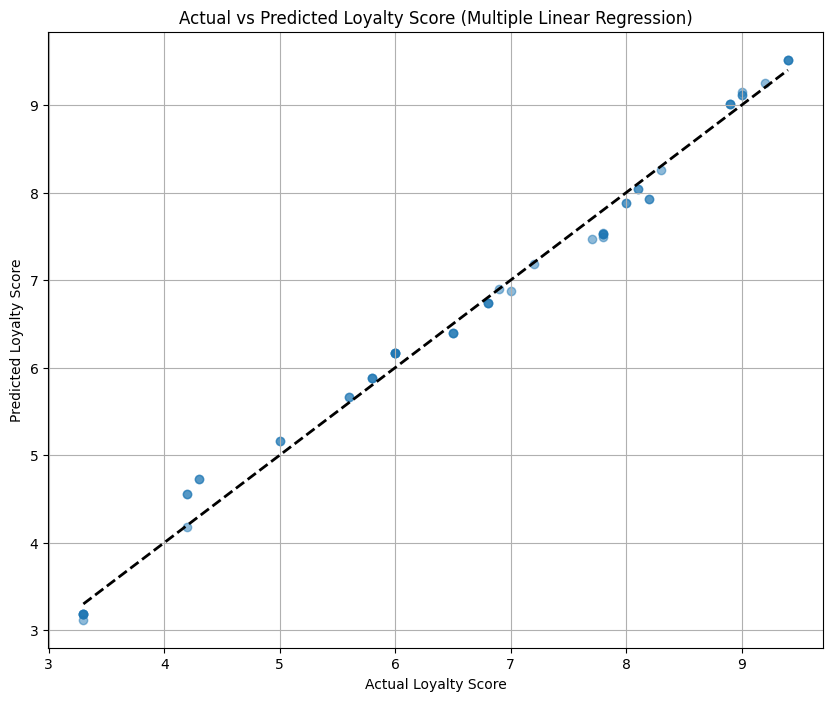

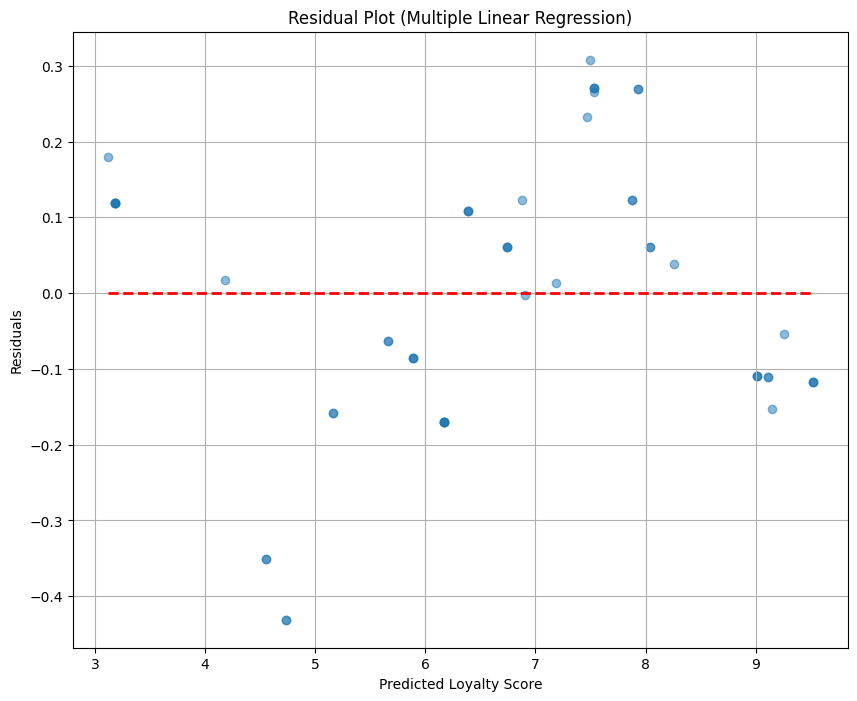

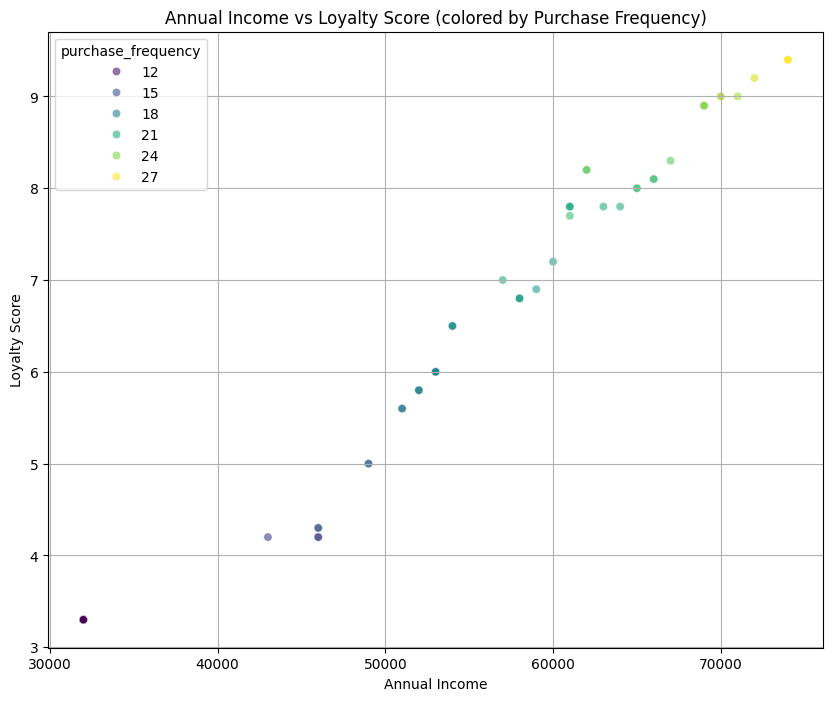

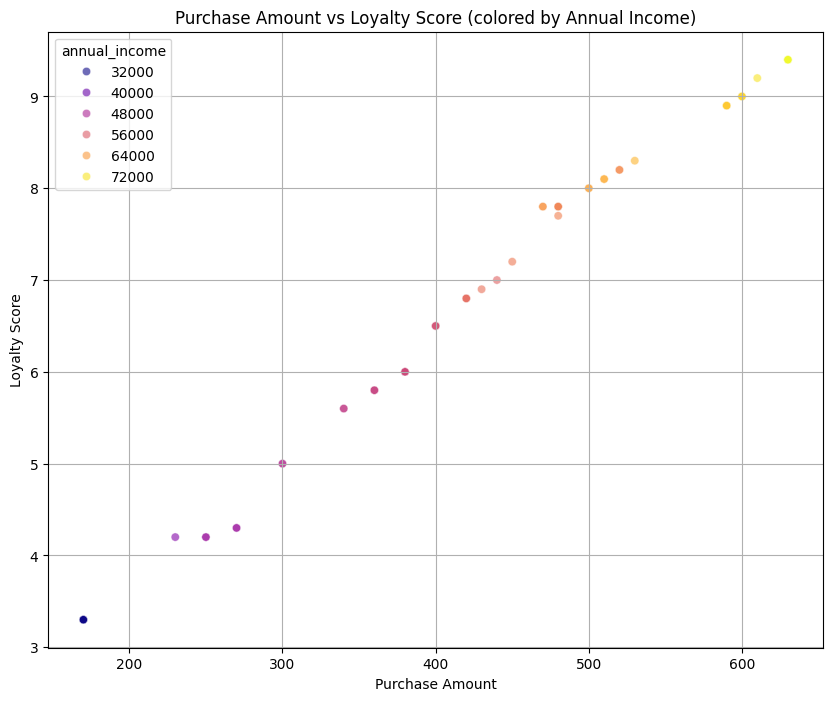

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(test_y_multiple, y_hat_multiple, alpha=0.5)
plt.plot([test_y_multiple.min(), test_y_multiple.max()], [test_y_multiple.min(), test_y_multiple.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual Loyalty Score")
plt.ylabel("Predicted Loyalty Score")
plt.title("Actual vs Predicted Loyalty Score (Multiple Linear Regression)")
plt.grid(True)
plt.show()

residuals_multiple = test_y_multiple - y_hat_multiple
plt.figure(figsize=(10, 8))
plt.scatter(y_hat_multiple, residuals_multiple, alpha=0.5)
plt.hlines(y=0, xmin=y_hat_multiple.min(), xmax=y_hat_multiple.max(), color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Loyalty Score")
plt.ylabel("Residuals")
plt.title("Residual Plot (Multiple Linear Regression)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='annual_income', y='loyalty_score', hue='purchase_frequency', data=test, palette='viridis', alpha=0.6)
plt.title('Annual Income vs Loyalty Score (colored by Purchase Frequency)')
plt.xlabel('Annual Income')
plt.ylabel('Loyalty Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='purchase_amount', y='loyalty_score', hue='annual_income', data=test, palette='plasma', alpha=0.6)
plt.title('Purchase Amount vs Loyalty Score (colored by Annual Income)')
plt.xlabel('Purchase Amount')
plt.ylabel('Loyalty Score')
plt.grid(True)
plt.show()
